In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from patchify import patchify, unpatchify
import os
import numpy as np
import matplotlib.patches as patches
import math

2023-04-16 00:21:01.036873: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 00:21:02.226747: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-16 00:21:02.231915: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-16 00:21:08.027975: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

In [2]:
model = tf.keras.models.load_model('/work/Cavity_detection/models/CNN/best_model.h5')


2023-04-16 00:21:21.128781: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /root/venv/lib/python3.9/site-packages/cv2/../../lib64:
2023-04-16 00:21:21.128845: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-16 00:21:21.128878: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-8f63fdc3-7b28-4cc7-8735-09f23d070fd3): /proc/driver/nvidia/version does not exist
2023-04-16 00:21:21.129226: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow 

1/1 [==============================] - 0s 306ms/step


array([[0.9660274]], dtype=float32)

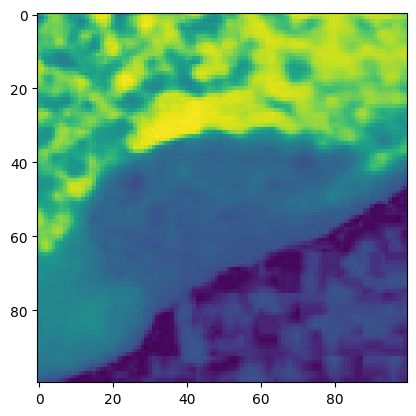

In [42]:
# clahe creation
clahe = cv2.createCLAHE(clipLimit =10.0, tileGridSize=(8,8)) # Parameters used in original paper
image = cv2.imread('/work/Cavity_detection/data/processed/caries/270_1.3206.jpg', cv2.IMREAD_GRAYSCALE)/255
# image = clahe.apply(image)/255.0
plt.imshow(image)

image = np.expand_dims(image, axis=-1)  # Add an extra dimension for the channel
image = np.expand_dims(image, axis=0)  # Add an extra dimension for the batch size

model.predict(image)

1/1 [==============================] - 1s 996ms/step


array([[1.]], dtype=float32)

1/1 [==============================] - 0s 137ms/step


array([[0.1369089]], dtype=float32)

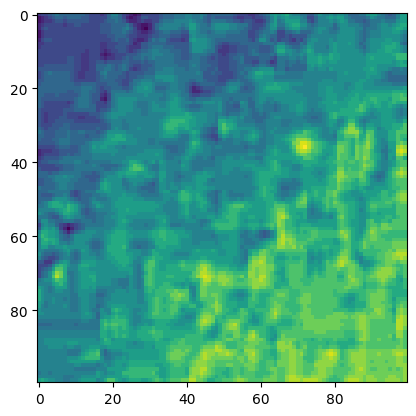

In [46]:
# clahe creation
clahe = cv2.createCLAHE(clipLimit =10.0, tileGridSize=(8,8)) # Parameters used in original paper
image = cv2.imread('/work/Cavity_detection/data/processed/no_caries/229.jpg', cv2.IMREAD_GRAYSCALE)/255.0
# image = clahe.apply(image)/255.0
no_carie = image
plt.imshow(image)
image = np.expand_dims(image, axis=-1)  # Add an extra dimension for the channel
image = np.expand_dims(image, axis=0)  # Add an extra dimension for the batch size

model.predict(image, verbose=1)

1/1 [==============================] - 0s 124ms/step
[[[1.33029304]
  [0.86001238]
  [0.51766427]
  ...
  [0.55598907]
  [1.27727958]
  [1.06974695]]

 [[0.98695657]
  [0.82938848]
  [0.85263051]
  ...
  [1.35020186]
  [0.48123716]
  [1.18223085]]

 [[0.79468097]
  [1.12414368]
  [0.57166631]
  ...
  [0.32382906]
  [0.95805548]
  [0.45865818]]

 ...

 [[1.14253297]
  [0.85164675]
  [0.54264786]
  ...
  [1.17596969]
  [1.07966833]
  [1.02873004]]

 [[0.84900684]
  [0.65707848]
  [1.34951562]
  ...
  [0.87903675]
  [0.81165481]
  [0.4390897 ]]

 [[0.42134714]
  [0.85441786]
  [1.43640019]
  ...
  [0.90409438]
  [0.26191225]
  [0.97725546]]]


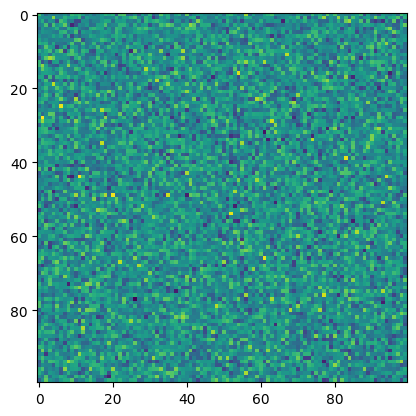

In [49]:
noise = np.random.normal(np.mean(no_carie), np.std(no_carie), (100, 100))
noise_cp = noise
plt.imshow(noise)
noise = np.expand_dims(noise, axis=-1)  # Add an extra dimension for the channel
noise = np.expand_dims(noise, axis=0)  # Add an extra dimension for the batch size
model.predict(noise)
print(max(noise))


1/1 [==============================] - 0s 195ms/step


array([[0.45182455]], dtype=float32)

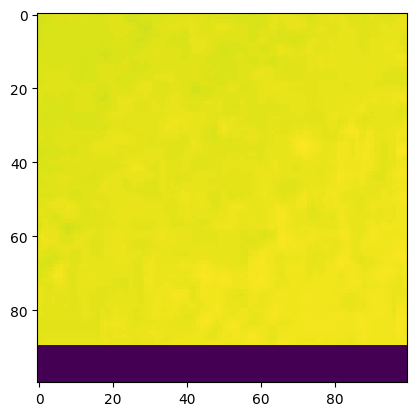

In [47]:
no_carie[90:,:] = noise_cp[90:,:] 
plt.imshow(no_carie)
image = no_carie
image = np.expand_dims(image, axis=-1)  # Add an extra dimension for the channel
image = np.expand_dims(image, axis=0)  # Add an extra dimension for the batch size
model.predict(image)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8f63fdc3-7b28-4cc7-8735-09f23d070fd3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>